<a href="https://colab.research.google.com/github/mkorlyakova/Ideal-Trader-Model/blob/main/Ideal_Trader_Time_series_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Временные ряды в бизнесе


Открыть биржевые данные можно через YAHoo finance

In [ ]:
import ipywidgets as widgets


In [ ]:
#https://github.com/santosjorge/cufflinks

In [ ]:
!pip install cufflinks

 - https://habr.com/ru/post/507954/

 - https://habr.com/ru/post/487644/

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=fe83c263a4b36a84caabc43aeaa4557567f793f48d983990411b6788cbb15298
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams['axes.facecolor'] = 'lightgray'


In [ ]:
import cufflinks as cf
import plotly.offline

In [ ]:
cf.go_offline()
cf.set_config_file(offline=True, world_readable=True)

In [ ]:
# Создаем объект для получения данных
import pandas as pd
tickers_list = ['YNDX.ME','TTLK.ME','^GSPC','AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP','BTC-USD','EURUSD=X','RUB=X']

# запишем данные в таблице
data = pd.DataFrame(columns=tickers_list)

# Получим данные

for ticker in tickers_list:
    data[ticker] = yf.download(ticker,'2014-01-01','2021-06-18')['Adj Close']

# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


YNDX.ME   TTLK.ME        ^GSPC  ...  BTC-USD  EURUSD=X      RUB=X
Date                                            ...                              
2014-06-04  1170.000000  0.099521  1927.880005  ...      NaN  1.362101  35.049000
2014-06-05  1145.099976  0.100479  1940.459961  ...      NaN  1.360415  34.943501
2014-06-06  1163.000000  0.099706  1949.439941  ...      NaN  1.366195  34.685001
2014-06-09  1172.099976  0.100473  1951.270020  ...      NaN  1.364294  34.397202
2014-06-10  1170.000000  0.099766  1950.790039  ...      NaN  1.359268  34.293201

[5 rows x 12 columns]

In [ ]:
data.tail()

YNDX.ME  TTLK.ME  ...  EURUSD=X      RUB=X
Date                              ...                     
2021-03-15  5002.000000   0.5005  ...  1.195000  73.318497
2021-03-16  5161.000000   0.4995  ...  1.192577  72.735001
2021-03-17  4988.399902   0.4995  ...  1.190165  72.867996
2021-03-18  4900.200195   0.5110  ...  1.198279  73.654800
2021-03-19  4923.000000   0.5070  ...  1.190760  74.210312

[5 rows x 12 columns]

Рисуем картинки

In [ ]:
from IPython.display import display,HTML


In [ ]:
import pandas as pd
import cufflinks as cf
import numpy as np

In [ ]:

%reload_ext autoreload
%autoreload 2

In [ ]:
cf.set_config_file(theme='ggplot',sharing='public',offline=False)

In [ ]:
df = data.drop('BTC-USD',axis=1)
df.iplot(filename='Tutorial 1')

In [ ]:
#((data.drop('BTC-USD',axis=1).pct_change()+1).cumprod())
df = data.drop('BTC-USD',axis=1)
df.iplot(bestfit=True)


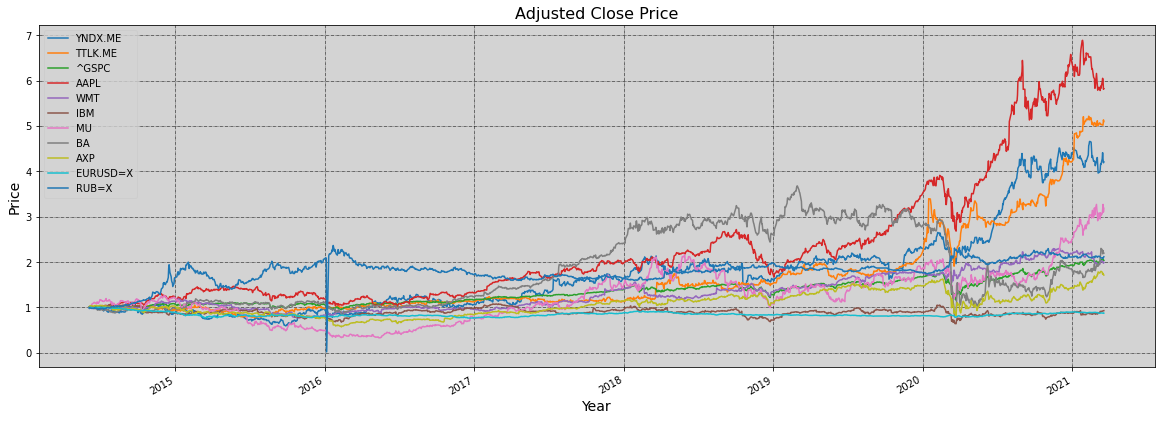

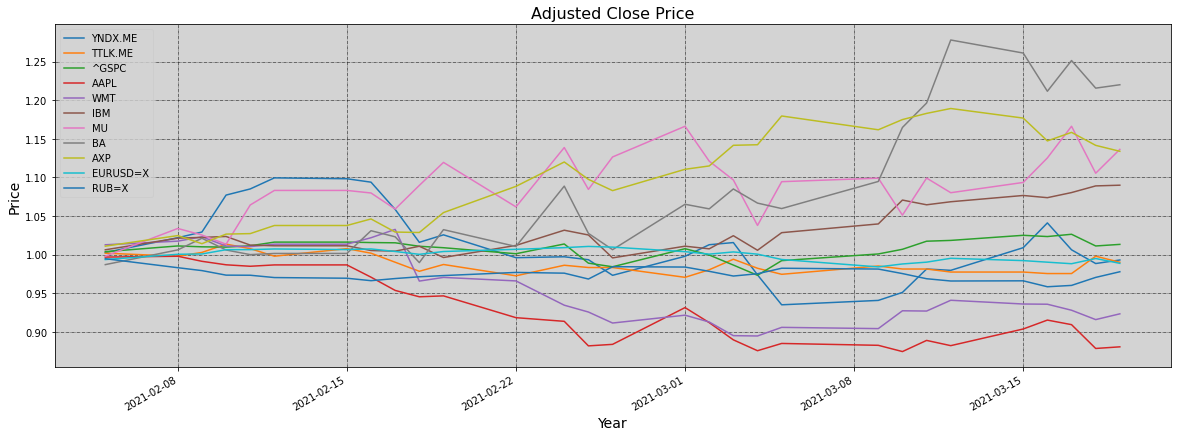

In [ ]:
# Plot all the close pricesfigsize=(20,7)

((data.drop('BTC-USD',axis=1).pct_change()+1).cumprod()).plot(figsize= (20,7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


((data.drop('BTC-USD',axis=1).iloc[-30:,:].pct_change()+1).cumprod()).plot(figsize= (20,7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

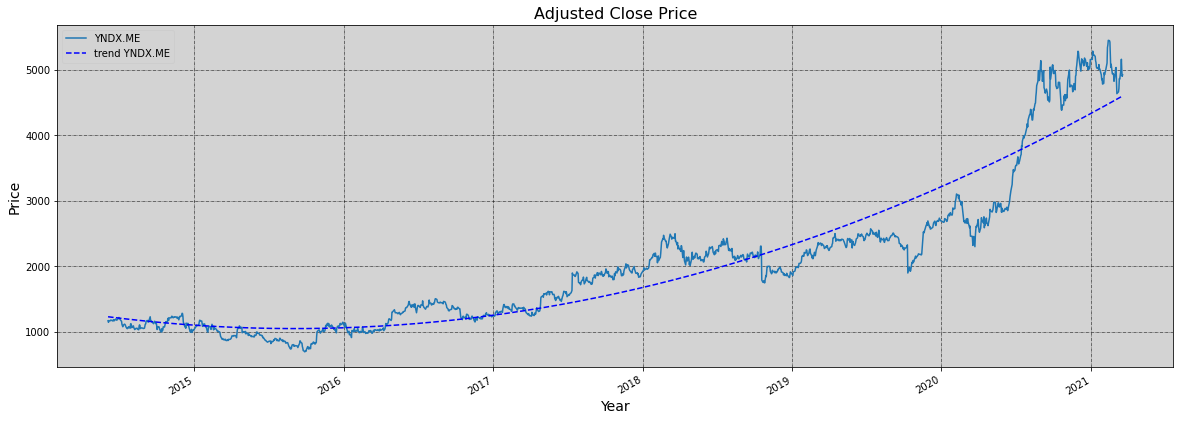

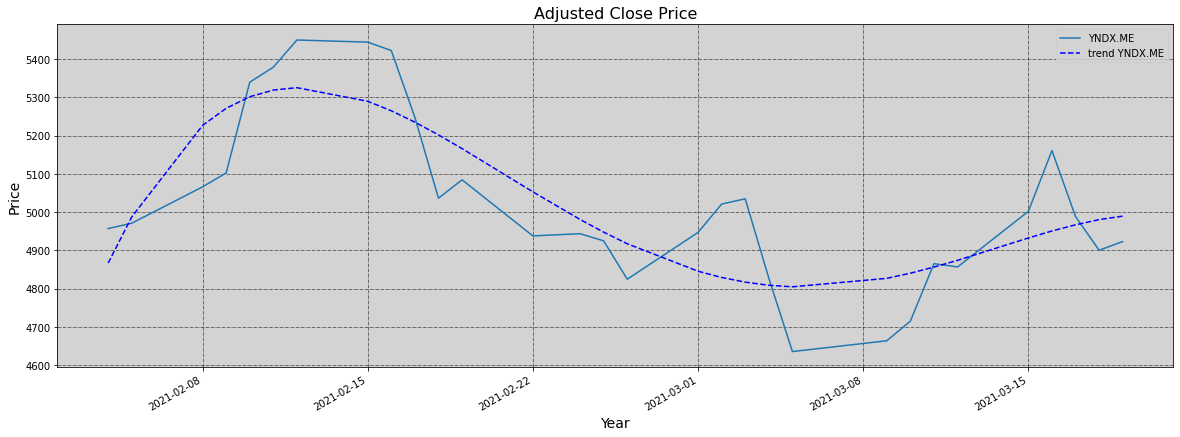

In [ ]:
# Plot all the close pricesfigsize=(20,7)

data['YNDX.ME'].plot(figsize= (20,7),  )
x1 = data.index
y_ = data['YNDX.ME'].values.reshape(-1,1)

xp  = x1.to_numpy(dtype='float')/10**19
w = np.polyfit(  xp,y_,2) 
p = np.poly1d(w[:,0])
y1 = p(xp)#
plt.plot(x1,y1,'--b', label = 'trend YNDX.ME')

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


data['YNDX.ME'].iloc[-30:].plot(  figsize= (20,7)  )



x = data.index[-30:]
y_ = data['YNDX.ME'].values[-30:].reshape(-1,1)

xp  = x.to_numpy(dtype='float')/10**19
w = np.polyfit(  xp,y_,4) 
p = np.poly1d(w[:,0])
y= p(xp)#


plt.plot(x,y,'--b', label = 'trend YNDX.ME')
# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

https://aroussi.com/post/python-yahoo-finance

In [ ]:
data.info


<bound method DataFrame.info of                 YNDX.ME   TTLK.ME  ...  EURUSD=X      RUB=X
Date                               ...                     
2014-06-04  1170.000000  0.099521  ...  1.362101  35.049000
2014-06-05  1145.099976  0.100479  ...  1.360415  34.943501
2014-06-06  1163.000000  0.099706  ...  1.366195  34.685001
2014-06-09  1172.099976  0.100473  ...  1.364294  34.397202
2014-06-10  1170.000000  0.099766  ...  1.359268  34.293201
...                 ...       ...  ...       ...        ...
2021-03-15  5002.000000  0.500500  ...  1.195000  73.318497
2021-03-16  5161.000000  0.499500  ...  1.192577  72.735001
2021-03-17  4988.399902  0.499500  ...  1.190165  72.867996
2021-03-18  4900.200195  0.511000  ...  1.198279  73.654800
2021-03-19  4923.000000  0.507000  ...  1.190760  74.210312

[1704 rows x 12 columns]>

In [ ]:

Yandex_rus = yf.Ticker("YNDX.ME")



In [ ]:
df = Yandex_rus.history(period = 'max')
df.head()

Open         High  ...  Dividends  Stock Splits
Date                                  ...                         
2014-06-04  1546.699951  1546.800049  ...          0             0
2014-06-05  1187.300049  1195.000000  ...          0             0
2014-06-06  1158.300049  1173.500000  ...          0             0
2014-06-09  1178.900024  1185.599976  ...          0             0
2014-06-10  1178.900024  1181.000000  ...          0             0

[5 rows x 7 columns]

In [ ]:
NQ_ = yf.Ticker('NQ=F')
NQ_df = NQ_.history(period = 'max')
NQ_df.head()

Open    High     Low   Close  Volume  Dividends  Stock Splits
Date                                                                       
2000-09-18  3721.0  3785.5  3602.0  3653.5   72994          0             0
2000-09-19  3658.5  3817.0  3656.0  3804.0   70029          0             0
2000-09-20  3801.5  3874.0  3715.5  3853.0   78832          0             0
2000-09-21  3852.0  3874.0  3744.0  3765.0   70719          0             0
2000-09-22  3673.0  3780.0  3615.0  3776.0   55926          0             0

In [ ]:
Data_time = df.merge(data, on='Date')
Data_time.head()

Open         High          Low  ...  BTC-USD  EURUSD=X      RUB=X
Date                                               ...                              
2014-06-04  1546.699951  1546.800049  1163.000000  ...      NaN  1.362101  35.049000
2014-06-05  1187.300049  1195.000000  1141.099976  ...      NaN  1.360415  34.943501
2014-06-06  1158.300049  1173.500000  1151.000000  ...      NaN  1.366195  34.685001
2014-06-09  1178.900024  1185.599976  1155.699951  ...      NaN  1.364294  34.397202
2014-06-10  1178.900024  1181.000000  1160.099976  ...      NaN  1.359268  34.293201

[5 rows x 19 columns]

In [ ]:
Data_time.drop('Close',axis=1, inplace=True)
Data_time.sort_index
Data_time.head()

Open         High          Low  ...  BTC-USD  EURUSD=X      RUB=X
Date                                               ...                              
2014-06-04  1546.699951  1546.800049  1163.000000  ...      NaN  1.362101  35.049000
2014-06-05  1187.300049  1195.000000  1141.099976  ...      NaN  1.360415  34.943501
2014-06-06  1158.300049  1173.500000  1151.000000  ...      NaN  1.366195  34.685001
2014-06-09  1178.900024  1185.599976  1155.699951  ...      NaN  1.364294  34.397202
2014-06-10  1178.900024  1181.000000  1160.099976  ...      NaN  1.359268  34.293201

[5 rows x 18 columns]

In [ ]:
data = Data_time.copy()

In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:

data['year'] = data.index.year
data['day_of_week'] = data.index.dayofweek
data['day_of_year'] = data.index.dayofyear
data['month'] = data.index.month
data.head()

Open         High  ...  day_of_year  month
Date                                  ...                    
2014-06-04  1546.699951  1546.800049  ...          155      6
2014-06-05  1187.300049  1195.000000  ...          156      6
2014-06-06  1158.300049  1173.500000  ...          157      6
2014-06-09  1178.900024  1185.599976  ...          160      6
2014-06-10  1178.900024  1181.000000  ...          161      6

[5 rows x 22 columns]

In [ ]:
# шаг по данным для построения обучающих примеров
step = 1

# длина прошлого 
p = 7
# горизонт предсказания
future = 1
h=future



In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [ ]:
#for i in range(p):
#  data['t'+str(i)] = 0.0
#  data['t'+str(i)].values[i+1:]=data['YNDX.ME'].values[:-1-i]


df.fillna(0)
# добавили сглаживание (3 вида - просто для коллекции)
data['exp_0_01'] = exponential_smoothing(data['YNDX.ME'], 0.01)
data['exp_0_03'] = exponential_smoothing(data['YNDX.ME'], 0.03)
data['exp_0_08'] = exponential_smoothing(data['YNDX.ME'], 0.08)
# добавим разности - 1-й порядок
data['diff1'] = 0.0
data['diff1'] = data['YNDX.ME'].diff(1)


data.head()

Open         High  ...     exp_0_08      diff1
Date                                  ...                        
2014-06-04  1546.699951  1546.800049  ...  1170.000000        NaN
2014-06-05  1187.300049  1195.000000  ...  1168.007998 -24.900024
2014-06-06  1158.300049  1173.500000  ...  1167.607358  17.900024
2014-06-09  1178.900024  1185.599976  ...  1167.966768   9.099976
2014-06-10  1178.900024  1181.000000  ...  1168.129426  -2.099976

[5 rows x 26 columns]

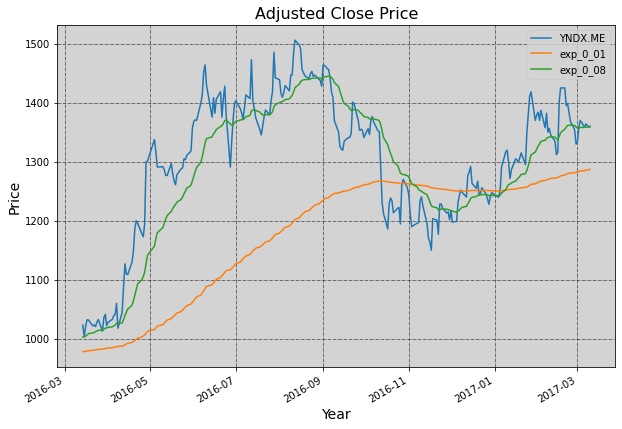

In [ ]:
# Plot all the close prices
data.loc['2016-03-12':'2017-03-12',['YNDX.ME','exp_0_01','exp_0_08']].plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

Сбросим бракованные данные (не полные и Nan)

In [ ]:
data = data.iloc[p+1:,:]

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
from scipy.signal import find_peaks, argrelextrema,find_peaks_cwt
import numpy as np

In [ ]:
def bay_sale(data = None,w = 30, delta = 0.001, verbose = 0, V = 100, name = ''):
  if data.shape[0]>0:
    x = data.values
    #peaks, _ = find_peaks(x, threshold = delta)
    peaks  = find_peaks_cwt(data, np.arange(1,w))
    peaks_max = argrelextrema(x, np.greater)
    peaks_min = argrelextrema(x, np.less)
    #print(peaks)
    if verbose:
      plt.figure(figsize=(16,16))
      plt.subplot(4,1,1)
      plt.plot(data.index,x)
      plt.plot(data.index[peaks], x[peaks], "x")
      plt.plot(data.index[peaks_max], x[peaks_max], "or", label = 'sale')
      plt.plot(data.index[peaks_min], x[peaks_min], "og", label = 'bay')
      plt.legend()
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.title('курс ' + name) 
      
    p_min_max = np.hstack([np.array(peaks_max),np.array(peaks_min)])
    #print(p_min_max[0])

    peaks_all = p_min_max[0].tolist()
    peaks_all.sort()
    #print(peaks_all)
    k = 0 # номер текушего начала позиции
    s = 0 # чило точек вперед по позициям
    all_sum = 0 #  общий доход

    Invest0 = V # начальная инвестиция 
    Invest = Invest0 # текущий инвест счет
    logger_bay_sale = np.zeros(shape =  (data.shape[0],1) )
    #logger_bay_sale[peaks_min] = 1
    #logger_bay_sale[peaks_max] = -1
    Profeat = Invest0 # доход 
    prof = []
    #print('sale :', k,'prof: ', Profeat)
    for i in peaks_all:
      #print(i)
      diff_sum = Invest0/x[k]*(x[i])-Invest0   
      
      #print(k,i, delta*Invest0*diff_sum, Invest,Profeat)                                   
      if (Invest==0)&(diff_sum > delta*Invest0)& (x[i]>0):
        
        Profeat = Profeat +  diff_sum - delta*Invest0 #+Invest0
        
        logger_bay_sale[i] = -1
        #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
        Invest = Invest0
        k = i
        
      #if (Invest==0) & (diff_sum <= delta*Invest0) & (diff_sum>0) & (k != i)& (x[i]>0):
        #print('no sale :', k)
        
      if (Invest>0)  & (diff_sum >=0)& (k != i) & (x[i]>0):
        #print('no bay :', k)
        k = i
        

      if (Invest>0) & (k != i) & (diff_sum <  0) & (x[i]>0):
        
        Profeat = Profeat # - Invest0
        logger_bay_sale[i] = 1
        #print('bay: ',i,'prof: ', Profeat, logger_bay_sale[i])
        
        k = i
        Invest = 0 
    

        
      prof.append([i,Profeat]) 
    
    
    prof = np.array(prof) 
    #print(prof[:,1],data.index[peaks_all])
    if verbose:
      plt.subplot(4,1,2)   
      plt.plot(data.index[peaks_all], prof[:,1] , "-b", label = 'общий доход')
      plt.legend()
      plt.title('общий доход трейдера') 
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.subplot(4,1,4) 
      dprof = prof[1:,1]-prof[:-1,1] 
      dprof = pd.DataFrame(data = dprof, index =data.index[peaks_all[:-1]], columns = ['prof'] )
      dprof['w7'] = dprof['prof'].rolling(7).sum()
      dprof['w7_std'] = dprof['prof'].rolling(7).std()
      plt.plot(data.index[peaks_all[:-1]], dprof['prof']  , "-r", label = 'доход на каждой операции')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7'] + dprof['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[peaks_all[:-1]], dprof['w7'] - dprof['w7_std']  , "-g")
      plt.fill_between(data.index[peaks_all[:-1]], dprof['w7'] - dprof['w7_std'], dprof['w7'] + dprof['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы трейдера')
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      #plt.plot(data.index[peaks_all[:-1]], dprof['w7_std']  , "-k")

      plt.legend()
      plt.subplot(4,1,3) 
      plt.plot(data.index, logger_bay_sale, "--b" , label = 'разметка трейдера')
      plt.legend()
      plt.title('акты покупки и продажи  (-1 : продажа, 0: нет действий, 1:покупка)')
      plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
      plt.show()


    return   logger_bay_sale, prof 


In [ ]:
slider = widgets.IntSlider(30, min=1, max=100)
slider

NameError: ignored

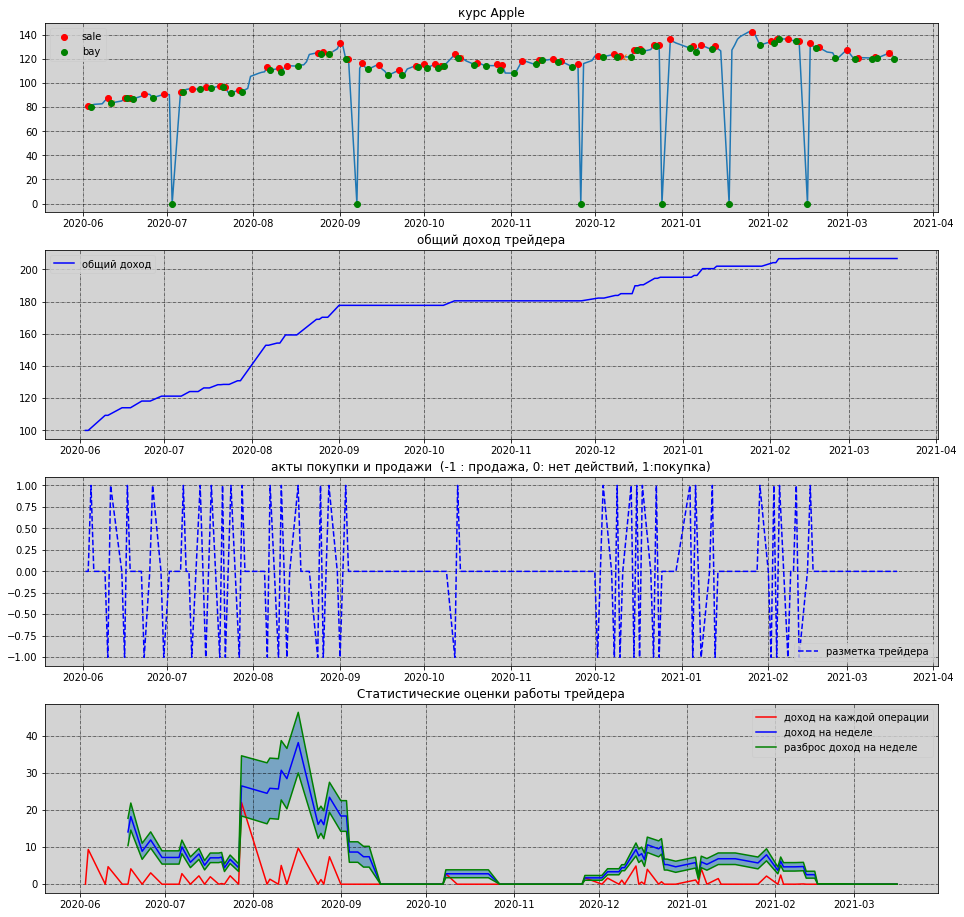

In [ ]:
logger_sb,prof = bay_sale(data = data['AAPL'].iloc[-200:], name = 'Apple',w = slider.value, delta = 0.001 ,verbose = 1)

In [ ]:
slider.value

30

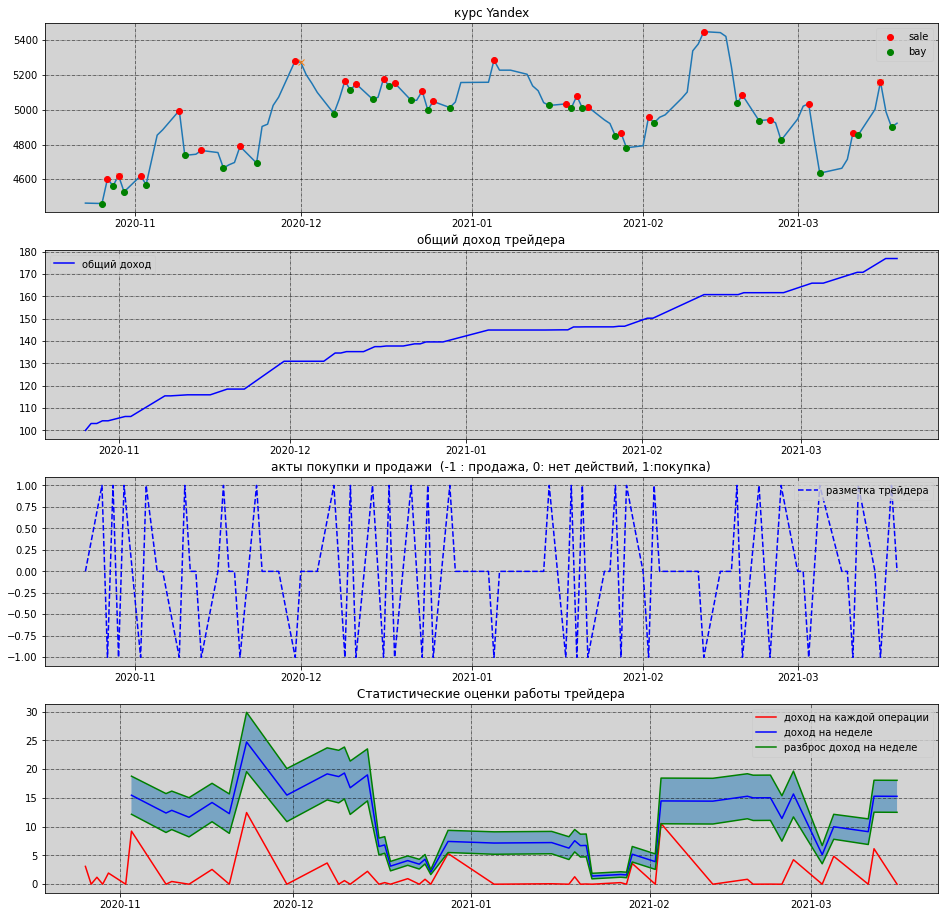

In [ ]:




logger_sb,prof = bay_sale(data = data['YNDX.ME'].iloc[-100:], name = 'Yandex', w = slider.value, delta = 0.001 ,verbose = 1, )

In [ ]:
y,prof_y = bay_sale(data = data['YNDX.ME'], delta = 0.001 ,verbose = 0)
ya,prof_ya = bay_sale(data = data['AAPL'], delta = 0.001 ,verbose = 0)

In [ ]:
data['A1'] = y
data['A2'] = ya

In [ ]:
#y = np.hstack([y,ya])
y.shape

(1696, 1)

In [ ]:
from tensorflow.keras import utils
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM

from google.colab import files
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
yr =utils.to_categorical(y+1).reshape((y.shape[0],3))
print(yr.shape)

X = data.copy() 

(1696, 3)


In [ ]:

# длина истории для работы
xLen = p

In [ ]:
y_target = yr[xLen+h:,:]
X_ = X.iloc[:-h,:]

print(y_target[-10:,-3:])
print(X_.tail(10))

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
                   Open         High          Low  ...       diff1   A1   A2
Date                                               ...                      
2021-03-04  4908.000000  4953.000000  4804.000000  ... -207.399902  0.0  0.0
2021-03-05  4729.799805  4819.799805  4634.000000  ... -192.000000  1.0  0.0
2021-03-09  4590.000000  4704.000000  4575.000000  ...   28.200195  0.0  0.0
2021-03-10  4725.000000  4831.200195  4682.000000  ...   51.399902  0.0  0.0
2021-03-11  4716.000000  4866.000000  4713.600098  ...  150.200195 -1.0  0.0
2021-03-12  4858.799805  4883.000000  4816.000000  ...   -8.600098  1.0  0.0
2021-03-15  4971.000000  5024.000000  4932.000000  ...  145.399902  0.0  0.0
2021-03-16  5049.200195  5173.600098  4957.000000  ...  159.000000 -1.0  0.0
2021-03-17  5136.000000  5145.600098  4955.000000  ... -172.600098  0.0  0.0
2021-03-18  4893.600098  4901.20

In [ ]:



X_data = []
X_net_data = []
for i in range(y_target.shape[0]):
  X_data.append(X_.iloc[i:i+xLen+1,:].values.reshape(-1))
  X_net_data.append(X_.iloc[i:i+xLen+1,:].values)
X_data = np.array(X_data)
X_net_data = np.array(X_net_data)

In [ ]:
y_target[-10,:]

array([0., 0., 1.], dtype=float32)

In [ ]:
X_net_data[-9,:,-3:]

array([[   5.80029297,   -1.        ,    0.        ],
       [ -18.80029297,    0.        ,    0.        ],
       [-100.19970703,    1.        ,    0.        ],
       [ 122.19970703,    0.        ,    0.        ],
       [  74.20019531,    0.        ,    0.        ],
       [  13.79980469,   -1.        ,    0.        ],
       [-207.39990234,    0.        ,    0.        ],
       [-192.        ,    1.        ,    0.        ]])

In [ ]:
print(X_net_data.shape)
print(X_data.shape)
print(y_target.shape)

(1688, 8, 28)
(1688, 224)
(1688, 3)


In [ ]:



train_split = -300
# вычисляем точку разделения ряда на тесты и тренировку
#train_split = data_f.shape[0] - valLen - bias
# делим
train_data = X_data[ : train_split - 1,:]
val_data = X_data[train_split:,:]
train_data[:5,-3:]


array([[  0.        ,   0.        ,   0.        ],
       [ 32.59997559,   0.        ,   0.        ],
       [  0.59997559,  -1.        ,  -1.        ],
       [-18.19995117,   0.        ,   1.        ],
       [ -8.        ,   0.        ,  -1.        ]])

In [ ]:
#chanel = [0,2,3,5]
chanel = [0,1,2]
xTrain = train_data
yTrain = y_target[0:train_split - 1,chanel]



xVal = val_data
yVal = y_target[train_split :,chanel]

scx = StandardScaler()
xTrains = scx.fit_transform(xTrain[:,:-2])
xTrains =np.hstack([xTrains, xTrain[:,-2:]])
xVals = scx.transform(xVal[:,:-2])
xVals =np.hstack([xVals ,xVal[:,-2:]])


In [ ]:
xTrain[:5,:],xTrains[:15,:4]

(array([[ 1.18009998e+03,  1.18500000e+03,  1.17600000e+03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.17600000e+03,  1.18269995e+03,  1.16500000e+03, ...,
          3.25999756e+01,  0.00000000e+00,  0.00000000e+00],
        [ 1.16519995e+03,  1.17900000e+03,  1.16000000e+03, ...,
          5.99975586e-01, -1.00000000e+00, -1.00000000e+00],
        [ 1.19309998e+03,  1.21880005e+03,  1.18500000e+03, ...,
         -1.81999512e+01,  0.00000000e+00,  1.00000000e+00],
        [ 1.20000000e+03,  1.20890002e+03,  1.19100000e+03, ...,
         -8.00000000e+00,  0.00000000e+00, -1.00000000e+00]]),
 array([[-0.76861846, -0.79981179, -0.73946309, -0.39006423],
        [-0.77605526, -0.8039554 , -0.7595977 , -0.39024775],
        [-0.7956451 , -0.81062098, -0.7687498 , -0.38625299],
        [-0.7450382 , -0.7389199 , -0.72298932, -0.35114131],
        [-0.73252248, -0.75675511, -0.7120068 , -0.38260387],
        [-0.75954913, -0.78179646, -0.78137973, -0.3823285

In [ ]:
print(xTrains.shape)

print(yTrain.shape)


print(xVals.shape)

print(yVal.shape)

(1387, 224)
(1387, 3)
(300, 224)
(300, 3)


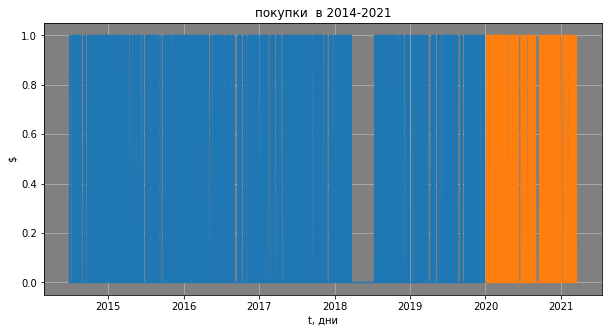

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_.index[p:train_split-1],yTrain[:,0])
plt.plot(X_.index[train_split:],yVal[:,0])
plt.grid('on')
plt.xlabel('t, дни')
plt.ylabel('$')
plt.title('покупки  в 2014-2021')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
import numpy as np

In [ ]:
n_class = yVal.shape[1]

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



gb = GradientBoostingClassifier(max_depth=10, random_state=0, n_estimators=200)
model_gb = MultiOutputClassifier(GradientBoostingClassifier(max_depth=10, random_state=0, n_estimators=200)).fit( xTrains, yTrain ) 
#model_gb.fit( xTrains, yTrain ) 


0
1
2


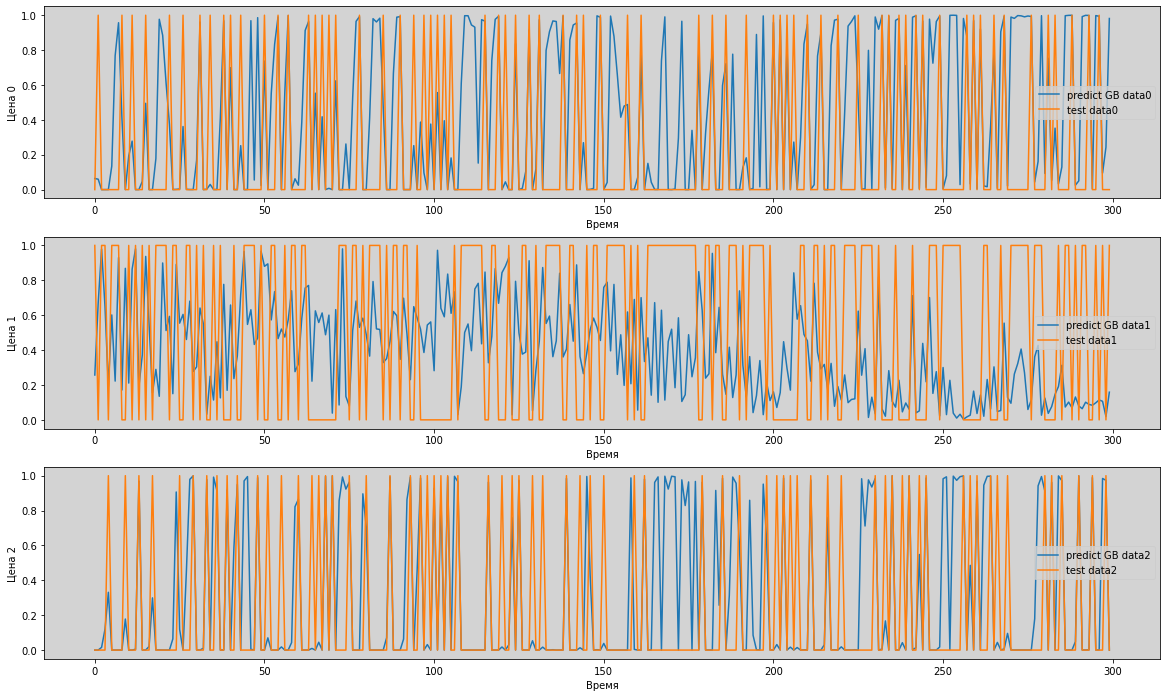

ошибка градиентного бустинга :   32.960657407719104 %


In [ ]:
X_test_pred_gb = model_gb.predict_proba(xVals)
yt=yVal
yp=X_test_pred_gb

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(yp[i][:,1], label='predict GB data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

er_g = np.mean(np.abs(yt[:,0] - yp[0][:,1]))*100
print('ошибка градиентного бустинга :  ', er_g, '%')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



0
1
2


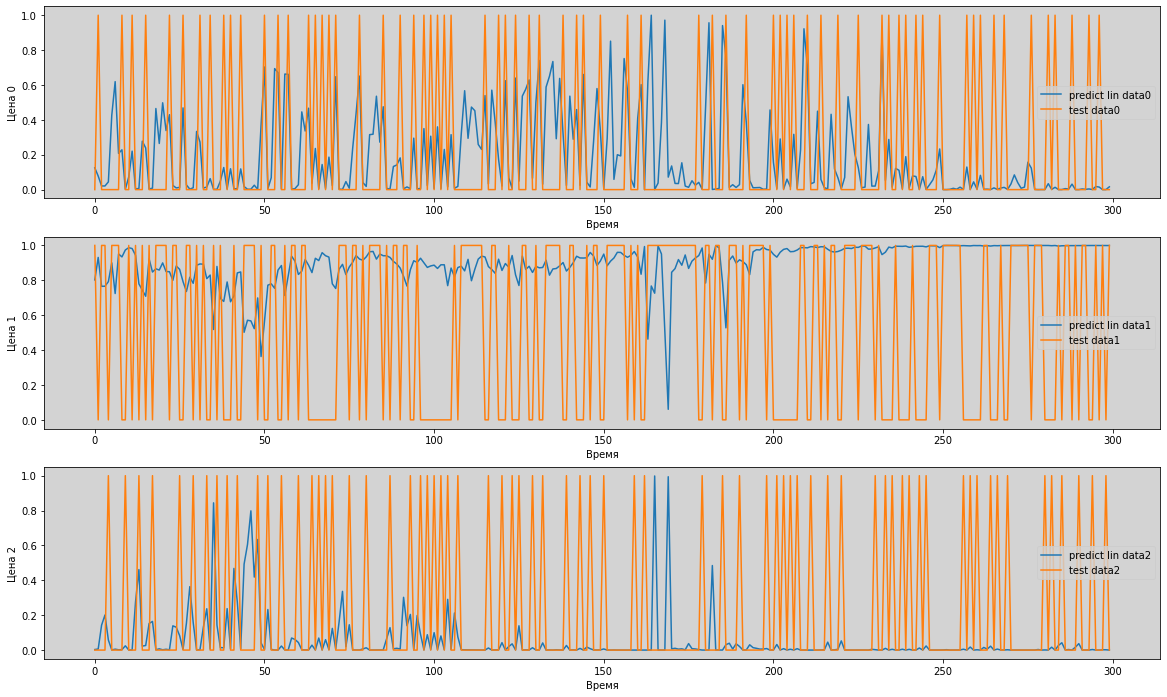

ошибка линейной модели :   27.815085021065954 %


In [ ]:
solver = 'saga'

model_l = MultiOutputClassifier(LogisticRegression( multi_class ='ovr', solver = solver, penalty='l1', max_iter=1000)).fit( xTrains, yTrain ) 

X_test_pred_l = model_l.predict_proba(xVals)
yt=yVal
yp=X_test_pred_l

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(yp[i][:,1], label='predict lin data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

er_l = np.mean(np.abs(yt[:,0] - yp[0][:,1]))*100

print('ошибка линейной модели :  ', er_l, '%')

In [ ]:
batch_size = 32


dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    xTrains[:-xLen+1,:],
    yTrain[xLen-1:,:],
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    xVals[:-xLen+1,:],
    yVal[xLen-1:,:],
    sequence_length=xLen,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (32, 7, 224)
Target shape: (32, 3)


In [ ]:
inputs, targets = X_net_data[:32,:,:],yTrain[:32]

In [ ]:
chanel = [0,1,2]

# делим
train_data = X_net_data[ : train_split - 1,:]
val_data = X_net_data[train_split:,:]


xTrain = train_data
yTrain = y_target[0:train_split - 1,chanel]



xVal = val_data
yVal = y_target[train_split :,chanel]



In [ ]:
calclbak = EarlyStopping(monitor='val_accuracy', patience=5)

Epoch 1/20
44/44 [==============================] - 3s 23ms/step - loss: 0.8085 - accuracy: 0.3449 - val_loss: 0.7394 - val_accuracy: 0.2433
Epoch 2/20
44/44 [==============================] - 0s 10ms/step - loss: 0.7084 - accuracy: 0.4570 - val_loss: 0.6759 - val_accuracy: 0.5333
Epoch 3/20
44/44 [==============================] - 0s 9ms/step - loss: 0.6751 - accuracy: 0.5271 - val_loss: 0.6774 - val_accuracy: 0.5333
Epoch 4/20
44/44 [==============================] - 0s 10ms/step - loss: 0.6683 - accuracy: 0.5481 - val_loss: 0.6818 - val_accuracy: 0.5333
Epoch 5/20
44/44 [==============================] - 0s 9ms/step - loss: 0.6625 - accuracy: 0.5428 - val_loss: 0.6817 - val_accuracy: 0.5367
Epoch 6/20
44/44 [==============================] - 0s 10ms/step - loss: 0.6481 - accuracy: 0.5679 - val_loss: 0.6874 - val_accuracy: 0.5367
Epoch 7/20
44/44 [==============================] - 0s 9ms/step - loss: 0.6441 - accuracy: 0.5861 - val_loss: 0.6979 - val_accuracy: 0.5367
Epoch 8/20
44/44

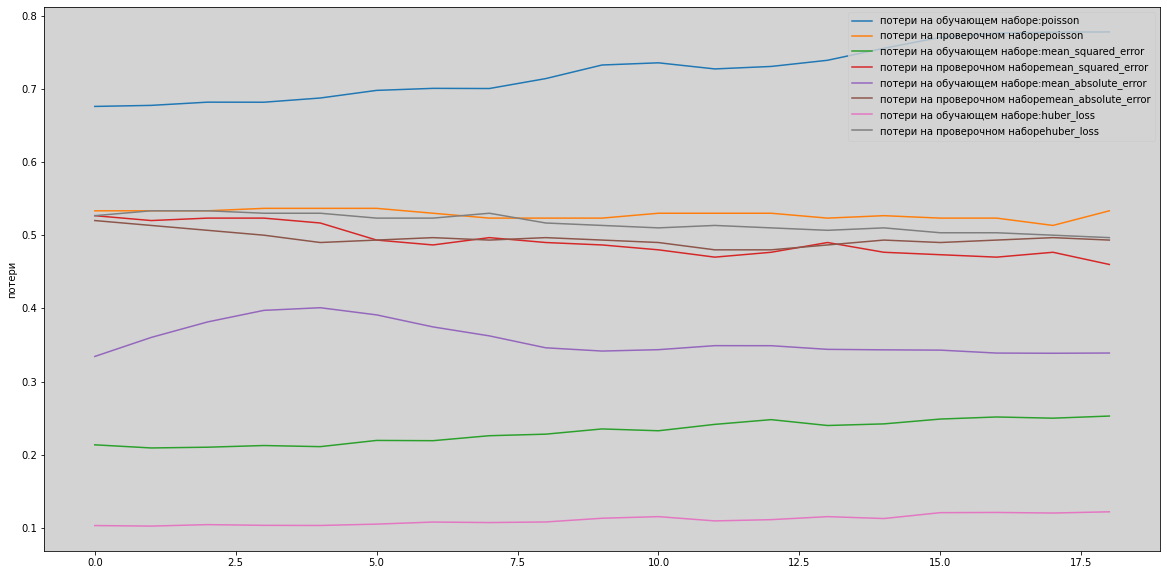

In [ ]:
epochs = 20
loss = keras.losses.CategoricalCrossentropy( from_logits=False )
loss_list = [keras.losses.Poisson(), keras.losses.MeanSquaredError(),keras.losses.MeanAbsoluteError(), keras.losses.Huber()]
plt.figure(figsize = (20,10))
for loss in loss_list:
  model = Sequential()

  model.add(LSTM(128, input_shape = (inputs.shape[1], inputs.shape[2]), return_sequences="True"))
  model.add(BatchNormalization())
  #model.add(LSTM(64, return_sequences="True")) # <None, 3,32>
  #model.add(Conv1D(64, 3, activation="relu")) #(None,3,64)
  model.add(Conv1D(64, 1, activation="linear"))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(BatchNormalization()) 
  model.add(Dense(n_class, activation="softmax"))

  model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])#'categorical_crossentropy'

  history = model.fit(
      xTrain,yTrain,
      epochs=epochs,
      validation_data=(xVal,yVal))#,
  #    callbacks=[callback])


  plt.plot(history.history['val_loss'][1:], 
         label='потери на обучающем наборе:'+loss.name)
  plt.plot(history.history['val_accuracy'][1:], 
         label='потери на проверочном наборе'+loss.name)
plt.ylabel('потери')
plt.legend()
plt.show()

Epoch 1/20
44/44 [==============================] - 4s 23ms/step - loss: 0.2744 - accuracy: 0.4135 - val_loss: 0.2316 - val_accuracy: 0.2333
Epoch 2/20
44/44 [==============================] - 0s 10ms/step - loss: 0.2123 - accuracy: 0.5021 - val_loss: 0.2194 - val_accuracy: 0.2633
Epoch 3/20
44/44 [==============================] - 0s 10ms/step - loss: 0.1875 - accuracy: 0.5655 - val_loss: 0.2265 - val_accuracy: 0.2333
Epoch 4/20
44/44 [==============================] - 0s 10ms/step - loss: 0.1828 - accuracy: 0.5772 - val_loss: 0.2190 - val_accuracy: 0.3467
Epoch 5/20
44/44 [==============================] - 0s 10ms/step - loss: 0.1723 - accuracy: 0.5852 - val_loss: 0.2034 - val_accuracy: 0.5333
Epoch 6/20
44/44 [==============================] - 0s 10ms/step - loss: 0.1694 - accuracy: 0.6097 - val_loss: 0.2169 - val_accuracy: 0.4833
Epoch 7/20
44/44 [==============================] - 0s 10ms/step - loss: 0.1656 - accuracy: 0.6123 - val_loss: 0.2176 - val_accuracy: 0.4267
Epoch 8/20
44

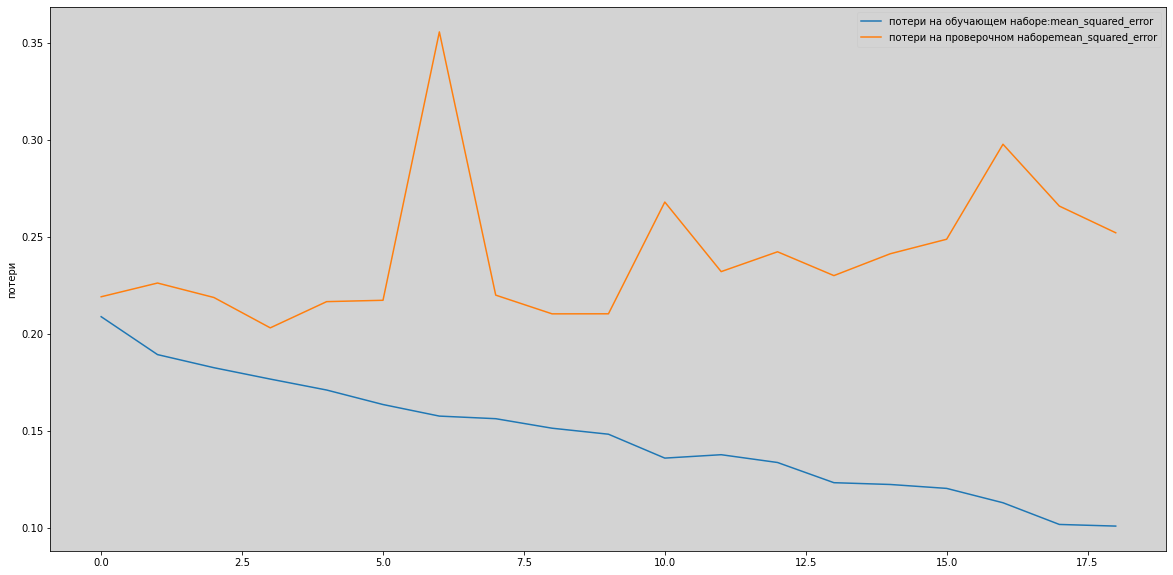

In [ ]:





epochs = 20
loss = keras.losses.CategoricalCrossentropy( from_logits=False )
loss_list = [keras.losses.MeanSquaredError()]
plt.figure(figsize = (20,10))
for loss in loss_list:
  model = Sequential()
  model.add(BatchNormalization(input_shape = (inputs.shape[1], inputs.shape[2])))
  model.add(LSTM(128, return_sequences="True"))
  model.add(BatchNormalization())
  #model.add(LSTM(64, return_sequences="True")) # <None, 3,32>
  #model.add(Conv1D(64, 3, activation="relu")) #(None,3,64)
  model.add(Conv1D(64, 3, activation="linear"))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64, activation="relu")) 
  model.add(BatchNormalization())

  model.add(Dense(n_class, activation="softmax"))

  model.compile(loss=loss, optimizer="adam", metrics=['accuracy'])#'categorical_crossentropy'

  history = model.fit(
      xTrain,yTrain,
      epochs=epochs,
      validation_data=(xVal,yVal))#,
  #    callbacks=[callback])


  plt.plot(history.history['loss'][1:], 
         label='потери на обучающем наборе:'+loss.name)
  plt.plot(history.history['val_loss'][1:], 
         label='потери на проверочном наборе'+loss.name)
plt.ylabel('потери')
plt.legend()
plt.show()

In [ ]:
history1 = model.fit(
      xTrain,yTrain,
      epochs=100,
      validation_data=(xVal,yVal),callbacks=[calclbak])

Epoch 1/100
44/44 [==============================] - 1s 11ms/step - loss: 0.0972 - accuracy: 0.8025 - val_loss: 0.2625 - val_accuracy: 0.4900
Epoch 2/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0913 - accuracy: 0.8133 - val_loss: 0.2553 - val_accuracy: 0.4833
Epoch 3/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0813 - accuracy: 0.8392 - val_loss: 0.2715 - val_accuracy: 0.4700
Epoch 4/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0757 - accuracy: 0.8493 - val_loss: 0.2704 - val_accuracy: 0.4800
Epoch 5/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0710 - accuracy: 0.8637 - val_loss: 0.2726 - val_accuracy: 0.5133
Epoch 6/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0656 - accuracy: 0.8717 - val_loss: 0.2600 - val_accuracy: 0.5167
Epoch 7/100
44/44 [==============================] - 0s 10ms/step - loss: 0.0614 - accuracy: 0.8832 - val_loss: 0.2667 - val_accuracy: 0.5067
Epoch 

In [ ]:
Y = model.predict(xVal)

In [ ]:
Y_sale_y = Y[:,0]
Y_bay_y = Y[:,1]
#Y_sale_a = Y[:,2]
#Y_bay_a = Y[:,3]

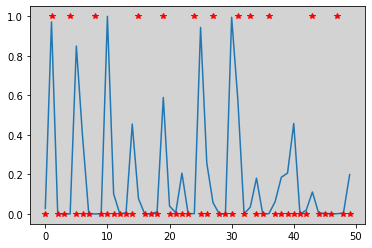

In [ ]:
plt.plot(Y_sale_y[:50], label = 'yandex sale val')
plt.plot(yVal[xLen-1:50+xLen-1,0], '*r')
plt.show()

0
1
2


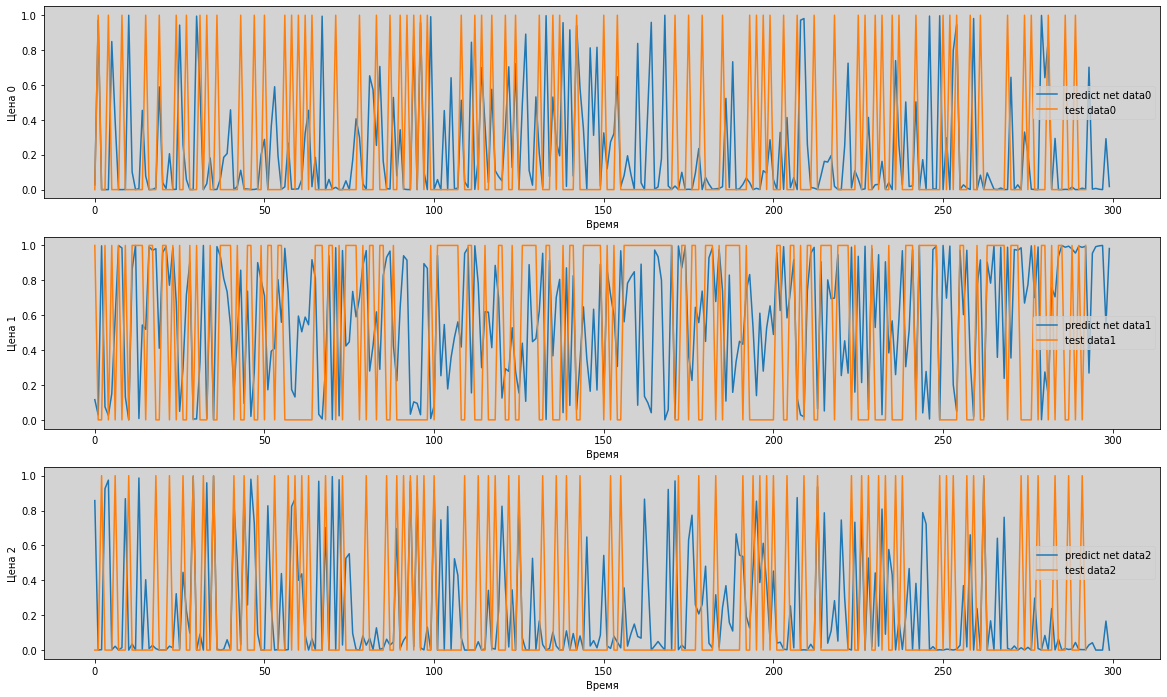

In [ ]:
yt=yVal[xLen-1:,:]

plt.figure( figsize=( 20, 4*n_class ))
for i in range(n_class):
  print(i)
  plt.subplot( n_class,1,i+1)
  plt.xlabel('Время')
  plt.ylabel('Цена '+str(i))
  plt.plot(Y[:,i], label='predict net data'+str(i) )
  plt.plot(yt[:,i], label='test data'+str(i))


  plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_28 (Batc (None, 8, 28)             112       
_________________________________________________________________
lstm_9 (LSTM)                (None, 8, 128)            80384     
_________________________________________________________________
batch_normalization_29 (Batc (None, 8, 128)            512       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 6, 64)             24640     
_________________________________________________________________
batch_normalization_30 (Batc (None, 6, 64)             256       
_________________________________________________________________
flatten_9 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)               

In [ ]:
def bay_sale_under_trader(df=None,y=None, ya = None, data = None,name='',w = 30, delta = 0.001,xLen = 7, verbose = 1, V = 100, model = None, scx = None):
  if (data.shape[0]>0) and (df.shape[0]>0):
    x = data.values
    df['A1'] = y
    df['A2'] = ya        
    
    if verbose:
      plt.figure(figsize=(16,16))
      plt.subplot(4,1,1)
      plt.plot(data.index,x, label = 'data')
      plt.grid('On')
      plt.title('курс '+ name) 

      plt.legend()
      
    k = 0 # номер текушего начала позиции
    kc=0
    s = 0 # чило точек вперед по позициям
    all_sum = 0 #  общий доход

    Invest0 = V # начальная инвестиция 
    Invest = Invest0 # текущий инвест счет
    Invest_c = Invest0 # текущий инвест счет
    logger_bay_sale = y[:,0]
    
    Profeat = Invest0 # доход 
    Profeat_client = Invest0 # доход
    
    prof = []
    profc = []
    #print('sale :', k,'prof: ', Profeat)
    for i in range(df.shape[0]):
      #print(i)
      diff_sum = Invest0/x[k]*(x[i])-Invest0   
      diff_sumc = Invest0/x[kc]*(x[i])-Invest0  
      if i > xLen+2:
        df_i = df.iloc[i-xLen-1:i-1,:]
        if i == 8:
          print(df_i.head())
        #df_is= scx.transform(df_i.iloc[:,:-2])
        #df_is = np.hstack([df_is, df_i.iloc[:,-2:].values])
        df_is = df_i.values
        if i == 8:
          print(df_is)
        df_i.values[:,:] = df_is
        #print(df_i.shape)
        y_class = model.predict(df_is.reshape((1,xLen,28)))
        y_class =  np.argmax(y_class) - 1 
        if i < 10:
          print(y_class, logger_bay_sale[i])
        if (Invest_c==0) & (y_class == -1 )& (x[i]>0):
          Profeat_client = Profeat_client +  diff_sumc - delta*Invest0 #+Invest0    
          #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
          Invest_c = Invest0
          kc = i
        if (Invest_c>0) & (y_class == 1 )& (kc != i):
          Profeat_client = Profeat_client
          kc =i
          Invest_c = 0
        if (Invest_c>0)  & (y_class == 0)& (k != i) & (x[i]>0):
          #print('no bay :', k)
          kc = i  


      #print(k,i, delta*Invest0*diff_sum, Invest,Profeat)                                   
      if (Invest==0) & (logger_bay_sale[i] == -1 )& (x[i]>0):
        
        Profeat = Profeat +  diff_sum - delta*Invest0 #+Invest0
        

        
        #print('sale :', i,'prof: ', Profeat, logger_bay_sale[i])
        Invest = Invest0
        k = i
        
        
      if (Invest>0)  & (logger_bay_sale[i] == 0)& (k != i) & (x[i]>0):
        #print('no bay :', k)
        k = i


      if (Invest>0) & (k != i) & (logger_bay_sale[i] == 1) & (x[i]>0):
        
        Profeat = Profeat # - Invest0
   
        #print('bay: ',i,'prof: ', Profeat, logger_bay_sale[i])
        
        k = i
        Invest = 0 
    

        
      prof.append([i,Profeat]) 
      profc.append([i,Profeat_client])
    
    
    prof = np.array(prof) 
    profc = np.array(profc) 
    #print(profc[:,1].shape,data.index.shape)

    if verbose:
      plt.subplot(4,1,2)   
      
      plt.plot(data.index, prof[:,1] , "-b", label = 'доход трейдера')
      plt.plot(data.index, profc[:,1] , "-r", label = 'доход клиента')#
      plt.legend()
      plt.grid('On')
      plt.title('общий доход трейдера/клиента') 

      
      dprof = prof[1:,1]-prof[:-1,1] 
      dprofс = profc[1:,1]-profc[:-1,1] 
      dprof = pd.DataFrame(data = dprof, index =data.index[:-1], columns = ['prof'] )
      dprofс = pd.DataFrame(data = dprofс, index =data.index[:-1], columns = ['prof'] )
      dprof['w7'] = dprof['prof'].rolling(7).sum()
      dprof['w7_std'] = dprof['prof'].rolling(7).std()
      dprofс['w7'] = dprofс['prof'].rolling(7).sum()
      dprofс['w7_std'] = dprofс['prof'].rolling(7).std()
      
      plt.subplot(4,1,4) 
      plt.grid('On')
      plt.plot(data.index[:-1], dprof['prof']  , "-r", label = 'доход на каждой операции')
      plt.plot(data.index[:-1], dprof['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[:-1], dprof['w7'] + dprof['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[:-1], dprof['w7'] - dprof['w7_std']  , "-g")
      plt.fill_between(data.index[:-1], dprof['w7'] - dprof['w7_std'], dprof['w7'] + dprof['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы трейдера')
      plt.legend()

      plt.subplot(4,1,3) 
      plt.grid('On')
      plt.plot(data.index[:-1], dprofс['prof']  , "-r", label = 'доход на каждой операции')
      plt.plot(data.index[:-1], dprofс['w7']  , "-b", label = 'доход на неделе')
      plt.plot(data.index[:-1], dprofс['w7'] + dprofс['w7_std']  , "-g", label = 'разброс доход на неделе')
      plt.plot(data.index[:-1], dprofс['w7'] - dprofс['w7_std']  , "-g")
      plt.fill_between(data.index[:-1], dprofс['w7'] - dprofс['w7_std'], dprofс['w7'] + dprofс['w7_std'], alpha=0.5)
      plt.title('Статистические оценки работы клиента')

      #plt.plot(data.index[peaks_all[:-1]], dprof['w7_std']  , "-k")

      plt.legend()
      plt.show()  
    
        
    if verbose:  
      plt.show()
      print('Доход трейдера за период c ',data.index[0],' по ',data.index[1],': ', prof[-1,1]-Invest0, '%')
      print('Доход клиента за период c ',data.index[0],' по ',data.index[1],': ', profc[-1,1]-Invest0, '%')


    return   prof, profc 

In [ ]:
y[:5,0]

array([ 0.,  1.,  0., -1.,  0.])

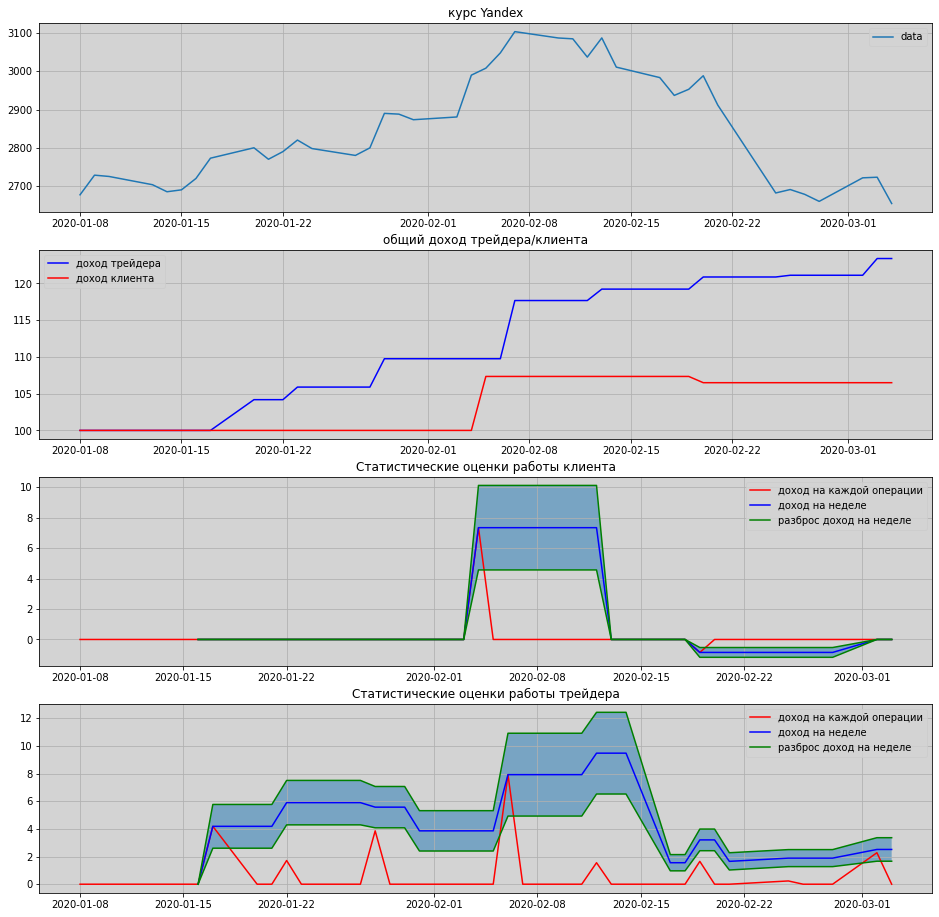

Доход трейдера за период c  2020-01-08 00:00:00  по  2020-01-09 00:00:00 :  23.385172426101732 %
Доход клиента за период c  2020-01-08 00:00:00  по  2020-01-09 00:00:00 :  6.492800750128168 %


In [ ]:
xLen = 8
Pideal,P = bay_sale_under_trader(df=data.iloc[-300:-260,:],y=y[-300:-260], ya = ya[-300:-260], name ='Yandex', data = data['YNDX.ME'].iloc[-300:-260],w = 30, xLen = xLen, delta = 0.001, verbose = 1, V = 100, model = model, scx = scx)


In [ ]:
P[-2:]

array([[ 38.        , 106.49280075],
       [ 39.        , 106.49280075]])

In [ ]:
Pideal[-2:]

array([[ 38.        , 123.38517243],
       [ 39.        , 123.38517243]])

In [ ]:
yp=model.predict(xVal[:50,:,:])

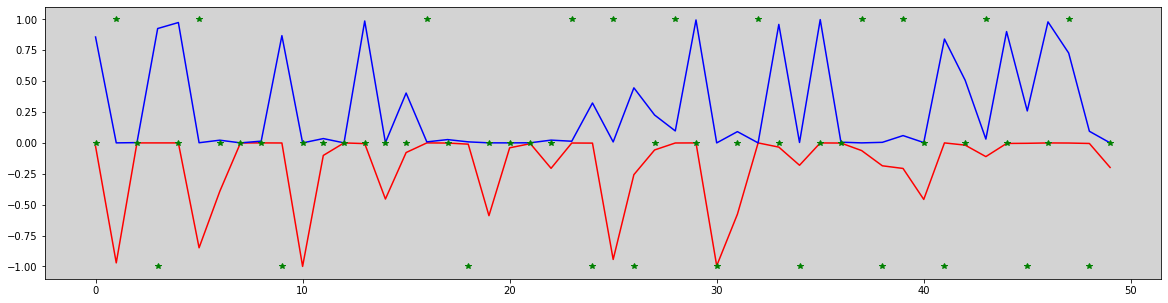

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(-yp[:,0],'-r')
plt.plot(yp[:,2],'-b')
plt.plot(y[0:50,0],'*g')
plt.show()

In [ ]:
yp[:10,:]

array([[3.0015342e-02, 9.4786263e-01, 2.2121999e-02],
       [9.9412316e-01, 5.8162003e-03, 6.0729373e-05],
       [1.8097311e-03, 9.9599129e-01, 2.1989923e-03],
       [3.9882348e-03, 6.7036593e-01, 3.2564577e-01],
       [1.0699163e-03, 8.4720081e-01, 1.5172921e-01],
       [7.3738247e-01, 2.6083249e-01, 1.7850689e-03],
       [7.7491826e-01, 8.4778316e-02, 1.4030342e-01],
       [8.1803948e-02, 8.7153542e-01, 4.6660606e-02],
       [3.0537245e-05, 9.9853826e-01, 1.4312030e-03],
       [1.7526589e-05, 7.3829740e-02, 9.2615271e-01]], dtype=float32)

In [ ]:
y[1:10]

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.]])